In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### Realizaremos una consulta a API de la web de [**Rapid**](https://rapidapi.com/hub)

1. Concretamente utilizaremos las dos APIS de Idealista que hay

    1.1 [**Primera API**](https://rapidapi.com/scraperium/api/idealista7/playground/apiendpoint_049292dd-e4d3-4873-97f6-87c73d4edd2f)

    1.2 [**Segunda API**](https://rapidapi.com/apidojo/api/idealista2/playground/apiendpoint_0338123f-ce53-45b2-be5f-b6ba558e170e)

**En este codigo hemos utilizado la primera API**, le llamamos al dataset "5month" debido a que en el primer momento este era el tiempo de que tenia la API en **Rapid**
<div style="text-align: center;">
  <table style="border: none; cellpadding: 0; cellspacing: 0; margin: 0 auto;">
    <tr>
      <td style="border: none; padding-right: 30px;">
        <a href="https://www.idealista.com/" target="_blank">
          <img src="https://st3.idealista.com/static/common/img/idealista.svg" alt="Idealista" width="300" height="200">
        </a>
      </td>
      <td style="border: none; padding-right: 30px;">
        <a href="https://opendata-ajuntament.barcelona.cat/ca" target="_blank">
          <img src="https://www.barcelona.cat/assets/images/brand/banner/2023/logo.svg" alt="Ajuntament de Barcelona" width="300" height="200">
        </a>
      </td>
      <td style="border: none;">
        <a href="https://rapidapi.com/hub" target="_blank">
          <img src="https://upload.wikimedia.org/wikipedia/commons/6/62/RapidAPI_logo.svg" alt="Rapid" width="300" height="200">
        </a>
      </td>
    </tr>
  </table>
</div>

In [ ]:
# Result es para importar los datos de idealista que ya he echo antes, en la primera iteración

result = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/idealista_api.csv', sep = ',')
result['size'].count()

/tmp/ipykernel_69016/4082776766.py:1: DtypeWarning: Columns (24,26,27,28,31,32,33,34,35,36,37,38,39,40,45,46,47,48,49,50,51,54,57,59,60,61,62,63,64,66,67,68,69,70,72,76,77,78,79,80,81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/Dataset_inicial_API_Idealista/idealista_meu.csv', sep = ',')


np.int64(20498)

In [ ]:
result.shape

(20498, 86)

Aquí podemos observar que los datos se han sacado en dos tiempos, con variedad entre ellos, más tarde los omogenizaremos

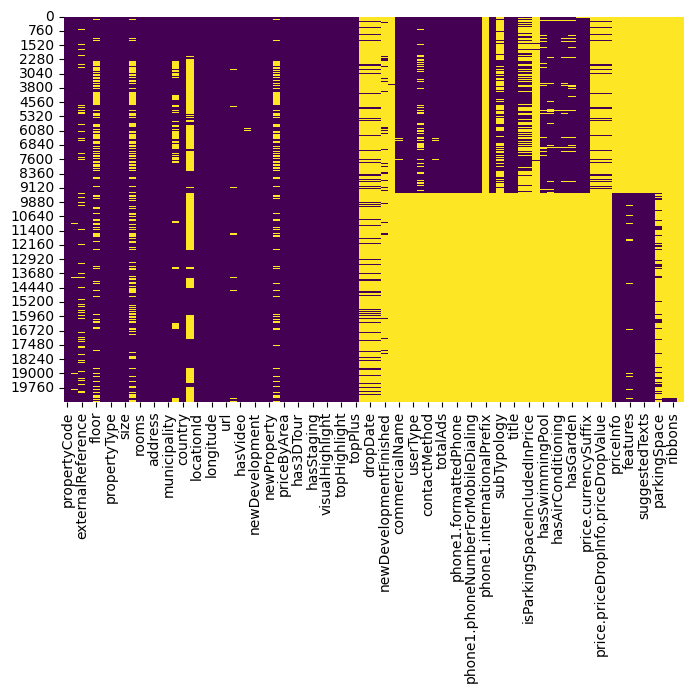

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(result.isna(), cmap='viridis', cbar=False)
plt.show()

In [ ]:
import plotly.express as px

# Dibujar un mapa con la distribución por longitud y latitud de las viviendas de la API

x = result['size'].count()

sample_data = result.sample(x)


fig = px.scatter_mapbox(
    sample_data,
    lat='latitude',
    lon='longitude',
    size='price',
    color='price',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=30,
    title='Preu per m² in Catalunya',
    labels={'price': 'Price per m²'},
    hover_name='municipality',
    hover_data={
        'latitude': True,
        'longitude': True,
        'price': True,
        'propertyCode': True
    },
    mapbox_style='open-street-map'
)


fig.update_layout(
    mapbox=dict(
        center=dict(lat=41.5, lon=1.5),
        zoom=8
    ),
    coloraxis_colorbar_title='price',
    coloraxis_colorbar_tickprefix='',
    coloraxis_colorbar_tickformat=',',
    title_font_size=24,
    title_x=0.5,
    margin={"r":0,"t":40,"l":0,"b":0},
    font=dict(size=14)
)


fig.add_annotation(
    dict(
        x=1.5,
        y=1.5,
        xref='paper',
        yref='paper',
        text="High Price Area",
        showarrow=True,
        arrowhead=2
    )
)

fig.show()


In [ ]:
import requests
import pandas as pd


# Extracción de datos de la API de rapidapi

url = "https://idealista2.p.rapidapi.com/properties/list"
result = pd.DataFrame()

for e in range(1, 15):
    x = e

    querystring = {
        "order": "relevance",
        "operation": "sale",
        "locationId": "0-EU-ES-08-02-005-124",
        "locationName": "Barcelona",
        "numPage": x,
        "maxItems": "40",
        "location": "es",
        "locale": "en"
    }

    headers = {
        "x-rapidapi-key": "api_key", # No se proporciona la contraenya de la api por privacidad de datos
        "x-rapidapi-host": "idealista7.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)


    print(f"Status Code {x}: {response.status_code}")

    if response.status_code == 200:

        data = response.json()

        print(data)


        element_list = data.get('elementList', [])


        if element_list:
            df = pd.DataFrame(element_list)
            result = pd.concat([result, df], ignore_index=True)
    else:
        print(f"Error: {response.text}")


print(result)


Status Code 1: 403
Error: {"message":"You are not subscribed to this API."}
Status Code 2: 429
Error: {"message":"Too many requests"}
Status Code 3: 429
Error: {"message":"Too many requests"}
Status Code 4: 429
Error: {"message":"Too many requests"}
Status Code 5: 429
Error: {"message":"Too many requests"}
Status Code 6: 429
Error: {"message":"Too many requests"}
Status Code 7: 429
Error: {"message":"Too many requests"}
Status Code 8: 429
Error: {"message":"Too many requests"}
Status Code 9: 429
Error: {"message":"Too many requests"}
Status Code 10: 429
Error: {"message":"Too many requests"}
Status Code 11: 429
Error: {"message":"Too many requests"}
Status Code 12: 429
Error: {"message":"Too many requests"}
Status Code 13: 429
Error: {"message":"Too many requests"}
Status Code 14: 429
Error: {"message":"Too many requests"}
Empty DataFrame
Columns: []
Index: []


In [ ]:
# Elimnamos columnas que no són de interes por el momento

result = result.drop(columns = ['multimedia', 'labels', 'ribbons','highlight'])


In [ ]:
result.head()

propertyCode                                          thumbnail  \
0    100638364  https://img4.idealista.com/blur/WEB_LISTING-M/...   
1     99128480  https://img4.idealista.com/blur/WEB_LISTING-M/...   
2    105835355  https://img4.idealista.com/blur/WEB_LISTING-M/...   
3     93214596  https://img4.idealista.com/blur/WEB_LISTING-M/...   
4     98352583  https://img4.idealista.com/blur/WEB_LISTING-M/...   

  externalReference  numPhotos floor      price propertyType operation   size  \
0          AR183392         34    bj   675000.0       duplex      sale  262.0   
1          AA177438         34     2   770000.0         flat      sale  197.0   
2          MAD52827         32     3   795000.0         flat      sale  155.0   
3          NA159492         32     3   430000.0       duplex      sale  150.0   
4          MH174175         41   NaN  1395000.0       chalet      sale  368.0   

  exterior  ...  price.priceDropInfo.formerPrice  \
0     True  ...                              NaN   
1     True  ...                              NaN   
2     True  ...                              NaN   
3     True  ...                              NaN   
4      NaN  ...                              NaN   

   price.priceDropInfo.priceDropValue price.priceDropInfo.priceDropPercentage  \
0                                 NaN                                     NaN   
1                                 NaN                                     NaN   
2                                 NaN                                     NaN   
3                                 NaN                                     NaN   
4                                 NaN                                     NaN   

  priceInfo contactInfo features detailedType suggestedTexts  \
0       NaN         NaN      NaN          NaN            NaN   
1       NaN         NaN      NaN          NaN            NaN   
2       NaN         NaN      NaN          NaN            NaN   
3       NaN         NaN      NaN          NaN            NaN   
4       NaN         NaN      NaN          NaN            NaN   

  isOnlineBookingActive  parkingSpace  
0                   NaN           NaN  
1                   NaN           NaN  
2                   NaN           NaN  
3                   NaN           NaN  
4                   NaN           NaN  

[5 rows x 83 columns]

In [ ]:
result['size'].count()

10131

In [ ]:
result.to_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/Dataset_inicial_API_Idealista/idealista_api.csv', sep = ",", index = False)

In [ ]:
df = result.copy()

En las lineas siguientes descompactamos el archivo JSON que hay dentro de freatures de la API de idealista

In [ ]:
import pandas as pd
import ast


def parse_dict(x):
    if x is None:
        return {}
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return {}
    elif not isinstance(x, dict):
        return {}
    return x

df['contactInfo'] = df['contactInfo'].apply(parse_dict)


parking_space_df = pd.json_normalize(df['contactInfo'])


if parking_space_df.empty:
    print("Warning: 'contactInfo' has no valid dictionary entries.")


df.reset_index(drop=True, inplace=True)
parking_space_df.reset_index(drop=True, inplace=True)


df = df.drop(columns=['contactInfo']).join(parking_space_df)

In [ ]:
import pandas as pd
import ast

def parse_dict(x):
    if x is None:
        return {}
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return {}
    elif not isinstance(x, dict):
        return {}
    return x

df['detailedType'] = df['detailedType'].apply(parse_dict)


parking_space_df = pd.json_normalize(df['detailedType'])


if parking_space_df.empty:
    print("Warning: 'detailedType' has no valid dictionary entries.")


df.reset_index(drop=True, inplace=True)
parking_space_df.reset_index(drop=True, inplace=True)


df = df.drop(columns=['detailedType']).join(parking_space_df)

In [ ]:
import pandas as pd
import ast

def parse_dict(x):
    if x is None:
        return {}
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return {}
    elif not isinstance(x, dict):
        return {}
    return x

df['suggestedTexts'] = df['suggestedTexts'].apply(parse_dict)


parking_space_df = pd.json_normalize(df['suggestedTexts'])


if parking_space_df.empty:
    print("Warning: 'suggestedTexts' has no valid dictionary entries.")


df.reset_index(drop=True, inplace=True)
parking_space_df.reset_index(drop=True, inplace=True)


df = df.drop(columns=['suggestedTexts']).join(parking_space_df)

In [ ]:
import pandas as pd
import ast

def parse_dict(x):
    if x is None:
        return {}
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return {}
    elif not isinstance(x, dict):
        return {}['size'].count()
df['parkingSpace'] = df['parkingSpace'].apply(parse_dict)


parking_space_df = pd.json_normalize(df['parkingSpace'])


if parking_space_df.empty:
    print("Warning: 'parkingSpace' has no valid dictionary entries.")


df.reset_index(drop=True, inplace=True)
parking_space_df.reset_index(drop=True, inplace=True)


df = df.drop(columns=['parkingSpace']).join(parking_space_df)

In [ ]:
import pandas as pd
import ast

def parse_dict(x):
    if x is None:
        return {}
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return {}
    elif not isinstance(x, dict):
        return {}
    return x

df['features'] = df['features'].apply(parse_dict)


parking_space_df = pd.json_normalize(df['features'])


if parking_space_df.empty:
    print("Warning: 'features' has no valid dictionary entries.")


df.reset_index(drop=True, inplace=True)
parking_space_df.reset_index(drop=True, inplace=True)


df = df.drop(columns=['features']).join(parking_space_df)

In [ ]:
import pandas as pd
import ast

def parse_dict(x):
    if x is None:
        return {}
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return {}
    elif not isinstance(x, dict):
        return {}
    return x

df['priceInfo'] = df['priceInfo'].apply(parse_dict)


parking_space_df = pd.json_normalize(df['priceInfo'])


if parking_space_df.empty:
    print("Warning: 'priceInfo' has no valid dictionary entries.")


df.reset_index(drop=True, inplace=True)
parking_space_df.reset_index(drop=True, inplace=True)


df = df.drop(columns=['priceInfo']).join(parking_space_df)

In [ ]:
print(df['size'].count())
df = df.drop_duplicates()
print(df['size'].count())

In [ ]:
df.to_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/idealista_api.csv', sep = ",", index = False)